In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2026-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\samir\AppData\Local\Temp\ipykernel_15396\3876087250.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.460487,16.528268,16.137911,16.152013,147611217
1,2012-01-04,16.531481,16.580214,16.341993,16.451085,114989399
2,2012-01-05,16.302168,16.424865,16.233398,16.379349,131808205
3,2012-01-06,16.079779,16.326657,16.074088,16.305629,108119746
4,2012-01-09,15.398018,16.005074,15.367590,15.992703,233776981
...,...,...,...,...,...,...
3457,2025-10-02,246.429993,247.634995,243.104996,245.639999,20657500
3458,2025-10-03,246.449997,247.117996,242.470001,245.229996,19941400
3459,2025-10-06,251.509995,252.199997,245.690002,245.779999,18309000


In [5]:
ma_100_days = data.Close.rolling(100).mean()

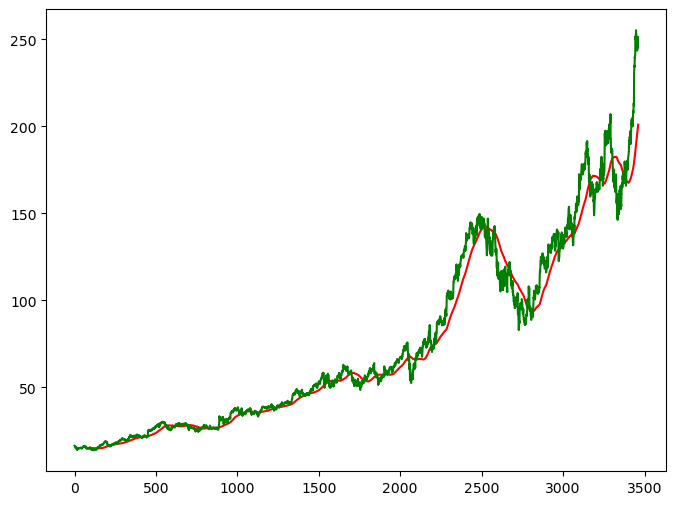

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

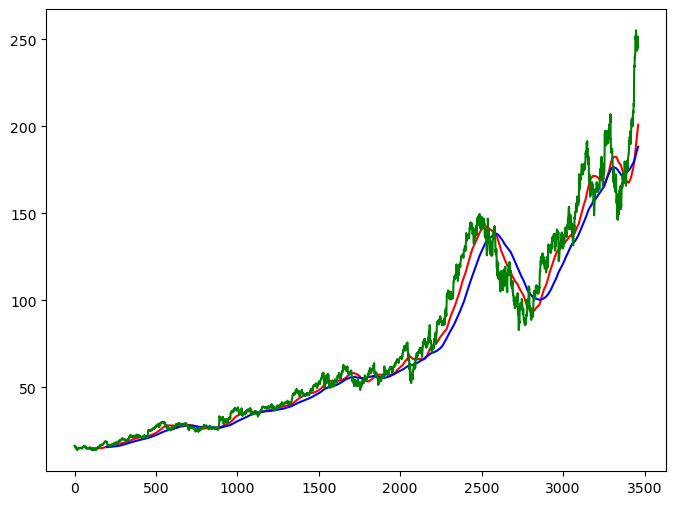

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2769

In [12]:
data_test.shape[0]

693

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\samir\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - loss: 0.0556
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 0.0068
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0060
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0043
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - loss: 0.0044
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0046
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 0.0038
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0034
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0041
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0037
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.0032
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0031
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0028
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.0032
Epoch 15/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

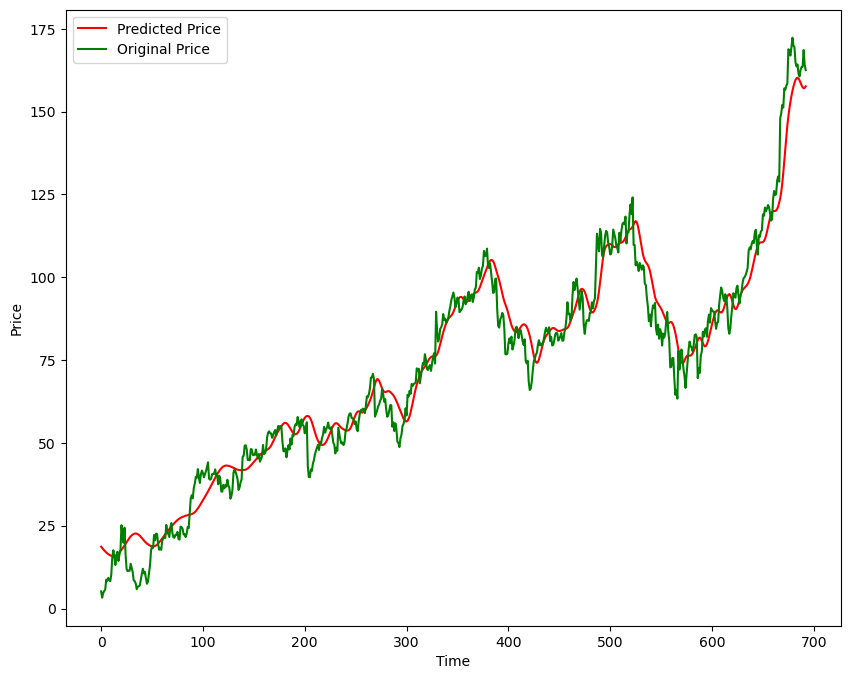

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')